In [2]:
import os
import pickle
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm_notebook
from datetime import date, datetime, timedelta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
%matplotlib notebook

What questions should we be asking, what information will be useful etc?

    What trends are there with Notifications? (use factors such as baby age, gender, location, premature etc..)
    When someone has multiple notifications, are they red and yellow? just red? etc..
    Query for SVT, RSV etc. eventually
    How many hours of active monitoring (base state 6+) vs hours of base state 4? AND total
    What definition of 1 notification will be the most useful for these questions?..
    How often do batteries die?
    How often is monitoring off?
    
    
1 notification: perception of the user? that is probably the most significant and this would most likely look like any time the base state enters an alert state from a different state (state 7 to 12 or even 12 to 9)
I have a way to count these and find them using 2 second data*** Maybe once I get my drive? will it be fast enough to pull it from the drive?

Using 16k from round 1*

## Total hours & days monitoring

In [3]:
def hours_of_monitoring(df):
    # take the full df and get rid of non monitoring data, 
    # get total (or valid?) count from each 10 min 
    #     (will tell you how much time in the 10 minutes was actually monitoring)
    # sum the total count for a df
    df_monitoring = df.loc[df.valid_count > 1]
    data_points = sum(df_monitoring['count'].values) # each data point is 2 sec of monitoring
    hours = ((data_points * 2)/60)/60
    return hours

def days_of_monitoring(df):
    # Should be able to take the full df and get rid of non monitoring data then resample by day and get # of rows
    # Do I want days with base 4+ or 6+? (with 10 min rollups I may only be able to do 4+ accurately)
    # This will give me # of babies each day (if multiple babies are monitored on 1 day that day will be counted multiple times)
    df_monitoring = df.loc[df.valid_count > 1]
    df_days = df_monitoring.resample('D').mean().dropna()
    return df_days.shape[0]

#### Days of monitoring

In [10]:
dsn_list = pickle.load(open("/Volumes/baileyWD/16k_round_1/rollups_dsns.p", "rb"))
# num_days = []
# for dsn in tqdm_notebook(dsn_list):
#     df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
#     # Find total number of hours and days with monitoring
#     num_days.append(days_of_monitoring(df_all))

In [11]:
# pickle.dump(num_days, open(f'/Volumes/baileyWD/16k_round_1/days_of_monitoring.p', 'wb'))

In [12]:
num_days = np.array(num_days)

In [13]:
sum(num_days)

1873586

<IPython.core.display.Javascript object>


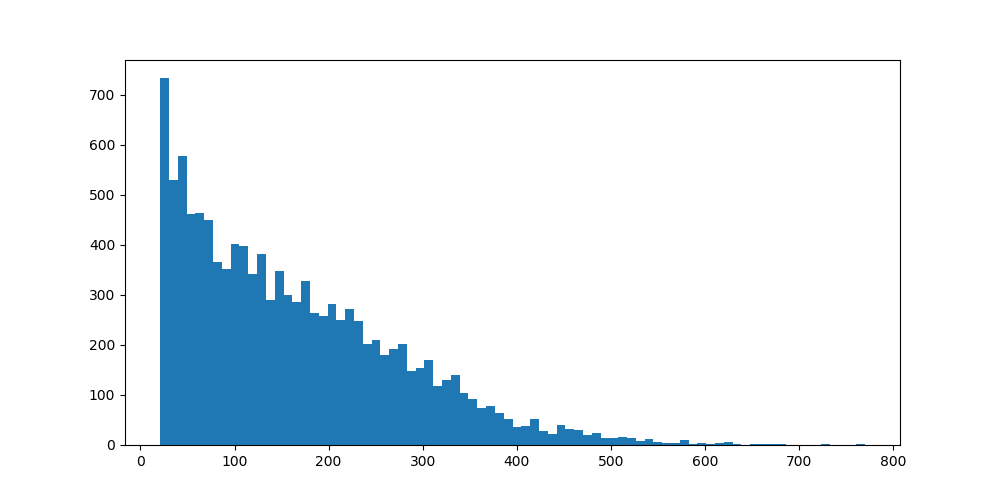

(array([733., 529., 578., 462., 463., 449., 366., 351., 401., 397., 341.,
        381., 290., 348., 300., 286., 327., 263., 258., 281., 249., 272.,
        248., 202., 209., 179., 192., 201., 148., 153., 170., 118., 129.,
        139., 103.,  91.,  74.,  77.,  63.,  51.,  35.,  38.,  51.,  27.,
         22.,  39.,  31.,  30.,  20.,  24.,  13.,  13.,  16.,  14.,   8.,
         12.,   5.,   4.,   3.,   9.,   2.,   3.,   2.,   3.,   5.,   1.,
          0.,   1.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([ 21.    ,  30.3625,  39.725 ,  49.0875,  58.45  ,  67.8125,
         77.175 ,  86.5375,  95.9   , 105.2625, 114.625 , 123.9875,
        133.35  , 142.7125, 152.075 , 161.4375, 170.8   , 180.1625,
        189.525 , 198.8875, 208.25  , 217.6125, 226.975 , 236.3375,
        245.7   , 255.0625, 264.425 , 273.7875, 283.15  , 292.5125,
        301.875 , 311.2375, 320.6   , 329.9625, 339.325 , 348.6875,
        358.05  , 367.4125, 376.775 , 386.1375

In [26]:
plt.hist(num_days[num_days>20], bins = 80)

#### Hours of monitoring

Total number of days with monitoring (base state 4 or higher) for the 15997 devices was 1,873,586 days

In [39]:
dsn_list = pickle.load(open("rollups_dsns.p", "rb"))
num_hours = []
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16000_dfs/{dsn}_df.p', 'rb'))
    # Find total number of hours and days with monitoring
    num_hours.append(hours_of_monitoring(df_all))

In [40]:
num_hours = np.array(num_hours)
sum(num_hours)

19267733.734444477

<IPython.core.display.Javascript object>


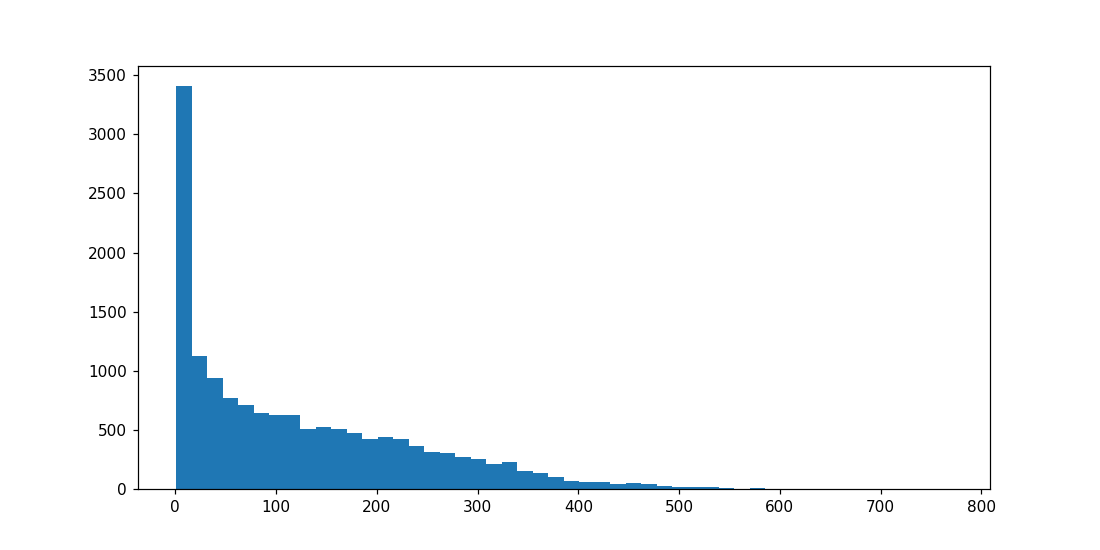

(array([3.406e+03, 1.131e+03, 9.440e+02, 7.750e+02, 7.100e+02, 6.430e+02,
        6.290e+02, 6.310e+02, 5.140e+02, 5.300e+02, 5.140e+02, 4.750e+02,
        4.260e+02, 4.470e+02, 4.230e+02, 3.670e+02, 3.140e+02, 3.120e+02,
        2.760e+02, 2.570e+02, 2.120e+02, 2.290e+02, 1.570e+02, 1.400e+02,
        1.080e+02, 7.500e+01, 6.600e+01, 6.300e+01, 4.500e+01, 5.300e+01,
        4.300e+01, 3.300e+01, 1.900e+01, 2.400e+01, 2.100e+01, 1.000e+01,
        6.000e+00, 1.000e+01, 4.000e+00, 6.000e+00, 6.000e+00, 0.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  16.38,  31.76,  47.14,  62.52,  77.9 ,  93.28, 108.66,
        124.04, 139.42, 154.8 , 170.18, 185.56, 200.94, 216.32, 231.7 ,
        247.08, 262.46, 277.84, 293.22, 308.6 , 323.98, 339.36, 354.74,
        370.12, 385.5 , 400.88, 416.26, 431.64, 447.02, 462.4 , 477.78,
        493.16, 508.54, 523.92, 539.3 , 554.68, 570.06, 585.44, 600.82,
        616.2 , 

In [44]:
plt.hist(num_days[num_days!=0], bins = 50)
# Maybe we should discard devices that are used less than ~17 days..?

Total number of hours with monitoring (base state 4 or bigger) for the 15997 devices was 19,267,733.73 hours

    Want to know how many of these hours were just base state 4. Could get a lower bound by looking at how many 10 minute intervals had only base_state_4 == 1

Only base state 4

In [112]:
base_4_hours = []
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16000_dfs/{dsn}_df.p', 'rb'))
    # Eliminate 10 minute intervals where the other base states == 1
    df_all = df_all.loc[(df_all.base_state_4 == 1) & (df_all.base_state_6 == 0) & (df_all.base_state_7 == 0) & (df_all.base_state_8 == 0) & (df_all.base_state_9 == 0) & (df_all.base_state_10 == 0) & (df_all.base_state_12 == 0)]
    base_4_hours.append(hours_of_monitoring(df_all))

In [115]:
base_4_hours = np.array(base_4_hours)
print('Lower bound on base state 4 hours:', sum(base_4_hours))
print('Upper bound on monitoring hours:', 19267733.73-sum(base_4_hours))

Lower bound on base state 4 hours: 1456342.6177777757
Upper bound on monitoring hours: 17811391.112222224


Not base state 4

In [136]:
not_base_4_hours = []
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    # Eliminate 10 minute intervals where the other base states == 1
    df_all = df_all.loc[(df_all.base_state_4 == 0) & ((df_all.base_state_6 == 0) | (df_all.base_state_7 == 0) | (df_all.base_state_8 == 1) | (df_all.base_state_9 == 1) | (df_all.base_state_10 == 1) | (df_all.base_state_12 == 1))]
    not_base_4_hours.append(hours_of_monitoring(df_all))

In [137]:
not_base_4_hours = np.array(not_base_4_hours)
print('Lower bound on monitoring hours:', sum(not_base_4_hours)) 
print('Upper bound on base state 4 hours:', 19267733.73-sum(not_base_4_hours))

Lower bound on monitoring hours: 17169767.593888916
Upper bound on base state 4 hours: 2097966.1361110844


Ranges for how many hours of monitoring vs not monitoring

Hours of base state 4 : 1,456,342.62 hours - 2,097,966.14 hours [7.5% - 10.8%]

Hours of monitoring (base state 6+) : 17,169,767.59 hours - 17,811,391.11 hours [89.2% - 92.5%]

#### Looks like about 9.1% of the data we collect is not actively monitoring (base state 4)

In [169]:
total = base_4_hours + not_base_4_hours
total[total == 0] = 1

In [171]:
individual_hours = pd.DataFrame({'base_4':base_4_hours, 'monitoring':not_base_4_hours, 'total':total})#.hist(bins=20)

<IPython.core.display.Javascript object>


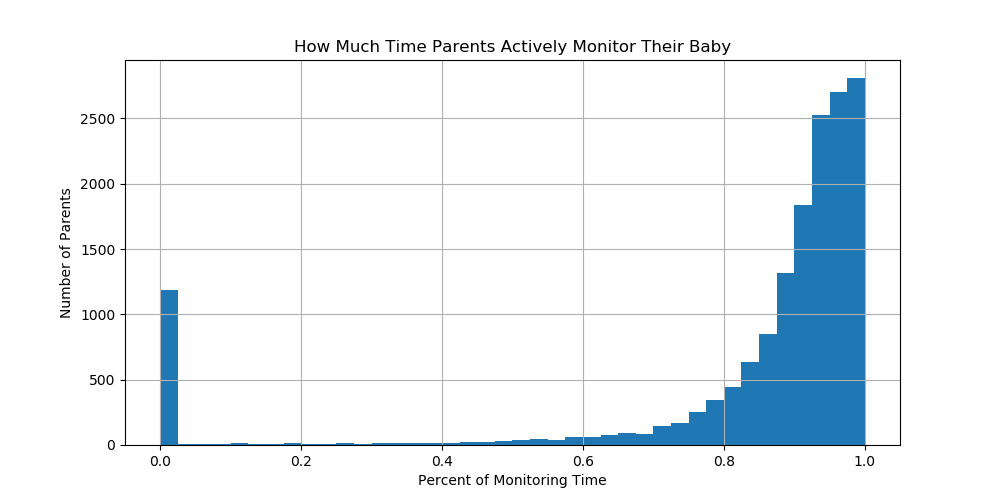

Text(0.5, 1.0, 'How Much Time Parents Actively Monitor Their Baby')

In [189]:
test = (individual_hours[individual_hours.total != 0].monitoring)/(individual_hours[individual_hours.total != 0].total)
test.hist(bins=40)
plt.xlabel('Percent of Monitoring Time')
plt.ylabel('Number of Parents')
plt.title('How Much Time Parents Actively Monitor Their Baby')


Base 4 (using 2 sec data)

In [32]:
def find_folder(dsn, folder_dsns):
    for num in [9,10,11,12,13,14,15,16]:
        if dsn in folder_dsns[f'BinaryMask{num}']:
            return num

In [33]:
folder_dsns = pickle.load(open('folder_dsns.p', 'rb'))
column_names = pd.read_csv('column_names.txt').columns

In [38]:
total_hours = {}
for dsn in tqdm_notebook(v2_round2):
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_2/16000_dfs/{dsn}_df.p', 'rb')).drop_duplicates()
    
    total_time = df_all['count'].sum() # total readings
    seconds = total_time*2
    hours = (seconds/60)/60
    base_4 = 0
    folder_2sec = find_folder(dsn,folder_dsns)
    for file in tqdm_notebook(glob(f'/Volumes/baileyWD/TwoSecondSockMask{folder_2sec}/{dsn}/*.csv.gz')):
        # load each 2sec day
        df_2sec = pd.read_csv(file, compression='gzip', names=column_names)
        total_base_4 = df_2sec.loc[df_2sec.base_state == 4].shape[0]
        seconds_base_4 = total_base_4*2
        hours_base_4 = (seconds_base_4/60)/60
        base_4 += hours_base_4
    
    total_hours[dsn] = [hours, base_4]

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [37]:
total_hours

{'AC000W002688102': [1205.375, 336.70611111111117]}

## Number of kids who have been monitored

In [52]:
df_bdays = bday_gender = pd.read_csv('/Users/brodriguez/Documents/parsed_datapoint_pre_20190113.csv', compression='gzip', index_col=0)
df_bdays = df_bdays.loc[df_bdays.property_name == 'BIRTHDATE'].reset_index(drop=True)
# should drop duplicates where dsn and bday is the same
df_bdays = df_bdays.drop_duplicates(["dsn","val_string"])
# Get rid of invalid bdays
df_bdays = df_bdays.loc[(df_bdays.val_string > '20160101') & (df_bdays.val_string < '20190130')]
    

In [8]:
baby_info = pickle.load(open('16k_reg_and_cc_bdays.p','rb'))

In [11]:
kids_16k = baby_info.query("dsn in @dsn_list")

In [71]:
# TODO Need to take dsns out that don't have monitoring data*****
def bdays_for_16000(df_bdays, dsn_list):
    bdays_for_16000 = []
    for dsn in tqdm_notebook(dsn_list):
        dsn_bdays = df_bdays.loc[df_bdays.dsn == dsn]
        bdays_for_dsn = list(dsn_bdays.index)
        bdays_for_16000 += bdays_for_dsn
    return bdays_for_16000

In [72]:
indices_16k = bdays_for_16000(df_bdays, dsn_list)

In [73]:
# kids_16k = df_bdays.loc[indices_16k] 

In [12]:
num_bdays_per_dsn = kids_16k.dsn.value_counts()

In [13]:
num_bdays_per_dsn

AC000W001183936    6
AC000W000453098    5
AC000W001124489    5
AC000W001051304    5
AC000W000238622    5
AC000W001053962    5
AC000W000668766    5
AC000W000327314    5
AC000W002587583    5
AC000W001093152    5
AC000W001095245    4
AC000W000366508    4
AC000W001106858    4
AC000W000232062    4
AC000W002441394    4
AC000W000443411    4
AC000W001084628    4
AC000W000419495    4
AC000W001178725    4
AC000W001085217    4
AC000W001146849    4
AC000W000674960    4
AC000W001047285    4
AC000W002429391    4
AC000W001153748    4
AC000W000660259    4
AC000W001182162    4
AC000W000652562    4
AC000W001099382    4
AC000W001135179    4
                  ..
AC000W002439391    1
AC000W001203622    1
AC000W001212447    1
AC000W001087501    1
AC000W001087989    1
AC000W001069973    1
AC000W003378177    1
AC000W001063764    1
AC000W002430012    1
AC000W001047132    1
AC000W002663420    1
AC000W002578691    1
AC000W003380122    1
AC000W002675170    1
AC000W002691893    1
AC000W001110489    1
AC000W0024259

In [57]:
# How many have more than 1, are the multiples actually different babys?
multiplicity = kids_16k.dsn.value_counts().values 


In [63]:
len(multiplicity[multiplicity == 1])

9903

Out of the 16000 dsns:
    
    12,366 have a listed bday
    9,903 were used by 1 baby
    2,174 were used by 2 babies
    372 had 3 listed bdays (need to investigate ~900)
    52 had 4 listed bdays (need to investigate: one: 2 two: 23 three: 20 four: 7. 136 total)
    9 had 5 listed bdays (need to investigate: looks like 3, 3, 1, 4, 1, >2, 4, 4, 3or4. 25 total) 
    1 had 6 listed bdays (need to investigate: looks like 4 babies were registered, did they use it?)
    
~ 14,500 (9,903 + 4,348 + 900 + 136 + 25 + 1) babies were monitored by the 12,366 devices based on baby profiles reported

In [1]:
9903 + 4348 + 900 + 136 + 25 + 4

15316

In [2]:
9903 + 4348 + 1116 + 208 + 35 + 6

15616

In [3]:
15316/12366

1.2385573346272036

## Average hours & days monitoring per kid

In [ ]:
# # of days/# of kids

## How many Red & Yellow notifications total

In [ ]:
# Need to define 1 notification...
# Break reds into low o2, low hr, hight hr (will have to check the vitals to identify)
# break yellows into sock off, low integrity read (base 9 vs 10)

In [191]:
# How many red alerts total (are there any that are NOT High hr, low Hr, low O2)
dsn_red_alerts = {}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    red_alerts = df_all.loc[(df_all.base_state_12 == 1)]
    if red_alerts.shape[0] != 0:
        dsn_red_alerts[dsn] = list(red_alerts.index)

In [7]:
# For each dsn, save timestamp for any interval with base_state_12 == 1
dsn_high_hr = {}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    red_alerts = df_all.loc[(df_all.base_state_12 == 1) & (df_all.heart_rate_raw_max >= 220)]
    if red_alerts.shape[0] != 0:
        dsn_high_hr[dsn] = list(red_alerts.index)

In [8]:
# For each dsn, save timestamp for any interval with base_state_12 == 1
dsn_low_hr = {}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    red_alerts = df_all.loc[(df_all.base_state_12 == 1) & (df_all.heart_rate_raw_min <= 60)]
    if red_alerts.shape[0] != 0:
        dsn_low_hr[dsn] = list(red_alerts.index)

In [6]:
# For each dsn, save timestamp for any interval with base_state_12 == 1
dsn_low_o2 = {}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    red_alerts = df_all.loc[(df_all.base_state_12 == 1) & (df_all.oxygen_raw_min <= 80)]
    if red_alerts.shape[0] != 0:
        dsn_low_o2[dsn] = list(red_alerts.index)

In [9]:
pickle.dump(dsn_high_hr, open('16k_dsn_high_hr.p','wb'))
pickle.dump(dsn_low_hr, open('16k_dsn_low_hr.p','wb'))
pickle.dump(dsn_low_o2, open('16k_dsn_low_o2.p','wb'))

In [ ]:
# pickle.load(dsn_high_hr, open('16k_dsn_high_hr.p', 'rb'))
# pickle.load(dsn_low_hr, open('16k_dsn_low_hr.p', 'rb'))
# pickle.load(dsn_low_o2, open('16k_dsn_low_o2.p', 'rb'))

In [115]:
# len(dsn_high_hr.keys())
high_hr_alerts = 0
for dsn, times in dsn_high_hr.items():
    high_hr_alerts += len(dsn_high_hr[dsn])

In [116]:
print(high_hr_alerts)

9384


In [120]:
low_hr_alerts = 0
for dsn, times in dsn_low_hr.items():
    low_hr_alerts += len(dsn_low_hr[dsn])

In [121]:
print(low_hr_alerts)

4648


In [125]:
low_o2_alerts = 0
for dsn, times in dsn_low_o2.items():
    low_o2_alerts += len(dsn_low_o2[dsn])

In [126]:
print(low_o2_alerts)

37932


In [67]:
for dsn, nights in dsn_low_hr.items():
    for night in nights:
        if date(2017,4,15) == night.date():
            print(dsn)

AC000W001125216
AC000W000418809
AC000W001047998
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W000401408
AC000W00

In [68]:
dsn_low_hr['AC000W000401408']

[Timestamp('2017-03-24 20:30:00+0000', tz='UTC'),
 Timestamp('2017-03-24 20:50:00+0000', tz='UTC'),
 Timestamp('2017-03-24 21:10:00+0000', tz='UTC'),
 Timestamp('2017-03-24 21:30:00+0000', tz='UTC'),
 Timestamp('2017-03-24 21:40:00+0000', tz='UTC'),
 Timestamp('2017-03-24 22:50:00+0000', tz='UTC'),
 Timestamp('2017-03-24 23:10:00+0000', tz='UTC'),
 Timestamp('2017-03-24 23:50:00+0000', tz='UTC'),
 Timestamp('2017-03-25 01:00:00+0000', tz='UTC'),
 Timestamp('2017-03-31 22:30:00+0000', tz='UTC'),
 Timestamp('2017-04-14 00:50:00+0000', tz='UTC'),
 Timestamp('2017-04-14 04:20:00+0000', tz='UTC'),
 Timestamp('2017-04-14 21:50:00+0000', tz='UTC'),
 Timestamp('2017-04-15 01:50:00+0000', tz='UTC'),
 Timestamp('2017-04-15 02:00:00+0000', tz='UTC'),
 Timestamp('2017-04-15 02:30:00+0000', tz='UTC'),
 Timestamp('2017-04-15 02:40:00+0000', tz='UTC'),
 Timestamp('2017-04-15 02:50:00+0000', tz='UTC'),
 Timestamp('2017-04-15 03:00:00+0000', tz='UTC'),
 Timestamp('2017-04-15 03:10:00+0000', tz='UTC'),


Approximate totals for alerts (some may be over counted if it lasted longer than 10 minutes e.g. AC000W000401408) Also doesn't separate alerts if there are multiple within a 10 minute interval:

    High Heart Rate - 9,384
    Low Heart Rate - 4,648
    Low Oxygen - 37,932

## How many notifications per night on average

Try to do # of babies that had a notification on any given night (don't double count for 1 baby..)

Try avg # of alerts for babies in a given week of gestation (don't want to be skewed because premature babies may have more)

In [56]:
def alerts_per_day(values, earliest_day, latest_day):
    alerts_each_day = {day.date():0 for day in pd.date_range(earliest_day, latest_day)}
    for baby_alerts in values:
        for alert in baby_alerts:
            alerts_each_day[alert.date()] += 1
    return alerts_each_day

earliest_day = min(df[df.values != 0].index)
latest_day = max(df[df.values != 0].index)

high_hr_per_day = alerts_per_day(list(dsn_high_hr.values()), earliest_day, latest_day)
low_hr_per_day = alerts_per_day(list(dsn_low_hr.values()), earliest_day, latest_day)
low_o2_per_day = alerts_per_day(list(dsn_low_o2.values()), earliest_day, latest_day)
total_per_day = alerts_per_day(list(dsn_low_o2.values()) + list(dsn_low_hr.values()) + list(dsn_high_hr.values()), earliest_day, latest_day)


In [64]:
low_hr_per_day

{datetime.date(2015, 11, 18): 0,
 datetime.date(2015, 11, 19): 0,
 datetime.date(2015, 11, 20): 0,
 datetime.date(2015, 11, 21): 0,
 datetime.date(2015, 11, 22): 0,
 datetime.date(2015, 11, 23): 0,
 datetime.date(2015, 11, 24): 0,
 datetime.date(2015, 11, 25): 0,
 datetime.date(2015, 11, 26): 0,
 datetime.date(2015, 11, 27): 0,
 datetime.date(2015, 11, 28): 1,
 datetime.date(2015, 11, 29): 0,
 datetime.date(2015, 11, 30): 0,
 datetime.date(2015, 12, 1): 1,
 datetime.date(2015, 12, 2): 2,
 datetime.date(2015, 12, 3): 0,
 datetime.date(2015, 12, 4): 3,
 datetime.date(2015, 12, 5): 1,
 datetime.date(2015, 12, 6): 4,
 datetime.date(2015, 12, 7): 0,
 datetime.date(2015, 12, 8): 2,
 datetime.date(2015, 12, 9): 0,
 datetime.date(2015, 12, 10): 0,
 datetime.date(2015, 12, 11): 0,
 datetime.date(2015, 12, 12): 0,
 datetime.date(2015, 12, 13): 0,
 datetime.date(2015, 12, 14): 0,
 datetime.date(2015, 12, 15): 0,
 datetime.date(2015, 12, 16): 0,
 datetime.date(2015, 12, 17): 0,
 datetime.date(2015

<IPython.core.display.Javascript object>


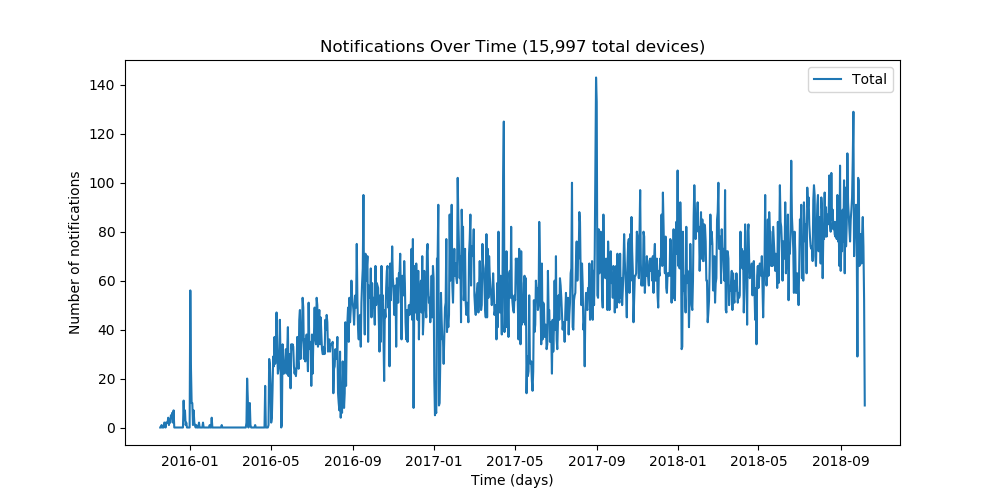

In [88]:
# df_low_o2 = pd.DataFrame.from_dict(low_o2_per_day, orient='index', columns=['values'])
# df_low_o2.sort_index(inplace=True)
# plt.plot(df_low_o2.index.values, df_low_o2['values'].values, label='Low O2')

# df_high_hr = pd.DataFrame.from_dict(high_hr_per_day, orient='index', columns=['values'])
# df_high_hr.sort_index(inplace=True)
# plt.plot(df_high_hr.index.values, df_high_hr['values'].values, label='High HR')

# df_low_hr = pd.DataFrame.from_dict(low_hr_per_day, orient='index', columns=['values'])
# df_low_hr.sort_index(inplace=True)
# plt.plot(df_low_hr.index.values, df_low_hr['values'].values, label='Low HR')

df_total = pd.DataFrame.from_dict(total_per_day, orient='index', columns=['values'])
df_total.sort_index(inplace=True)
plt.plot(df_total.index.values, df_total['values'].values, label='Total')

plt.xlabel("Time (days)")
plt.ylabel("Number of notifications")
plt.title("Notifications Over Time (15,997 total devices)")
plt.legend(loc='best')

In [35]:
day_counts = {day.date():0 for day in pd.date_range('20150101', '20190131')}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'16000_dfs/{dsn}_df.p', 'rb'))
    df_all = df_all.resample('D').mean().dropna()
    if df_all.shape[0] != 0:
        for day in df_all.index:
            day_counts[day.date()] += 1

<IPython.core.display.Javascript object>


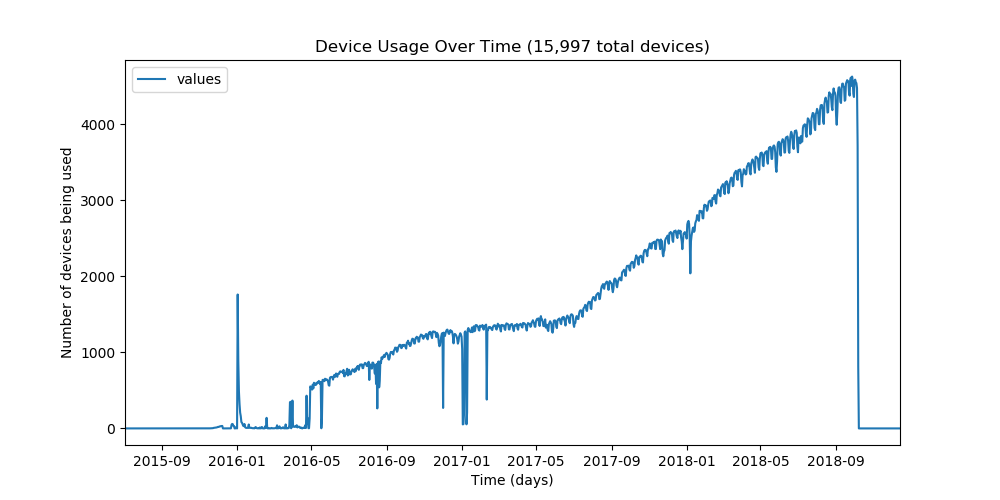

Text(0.5, 1.0, 'Device Usage Over Time (15,997 total devices)')

In [37]:
df = pd.DataFrame.from_dict(day_counts, orient='index', columns=['values'])
df.sort_index(inplace=True)
df.plot()
plt.xlabel("Time (days)")
plt.ylabel("Number of devices being used")
plt.title("Device Usage Over Time (15,997 total devices)")

datetime.date(2015, 11, 18)

## How many babies on average get 1 or more in a night

In [81]:
# Set of all the days that were saved of notifications, then for each day how many babies had a notification that day

list_of_days = list(dsn_low_o2.values()) + list(dsn_low_hr.values()) + list(dsn_high_hr.values())
days = set([item.date() for sublist in list_of_days for item in sublist])

In [98]:
def alerts_per_baby_night(dictionary, days):
    alert_per_baby_night = {}
    for day in days:
        for dsn, alerts in dictionary.items():
            for alert in alerts:
                if day == alert.date():
                    if day in alert_per_baby_night.keys():
                        alert_per_baby_night[day] += 1
                    else:
                        alert_per_baby_night[day] = 1
    return alert_per_baby_night


high_hr_per_night = alerts_per_baby_night(dsn_high_hr, days)
low_hr_per_night = alerts_per_baby_night(dsn_low_hr, days)
low_o2_per_night = alerts_per_baby_night(dsn_low_o2, days)


<IPython.core.display.Javascript object>


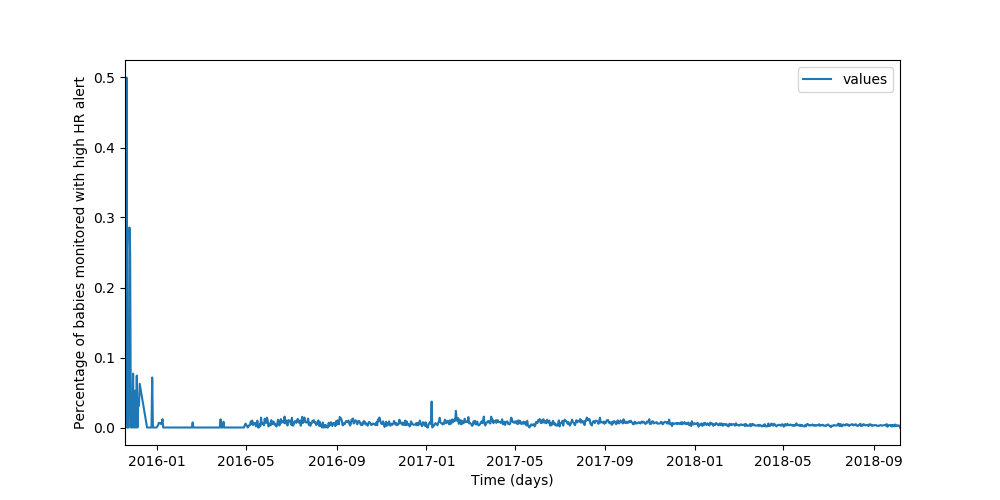

Text(0, 0.5, 'Percentage of babies monitored with high HR alert')

In [109]:
df_high_hr_per_night = pd.DataFrame.from_dict(high_hr_per_night, orient='index', columns=['values'])
df_high_hr_per_night.sort_index(inplace=True)
(df_high_hr_per_night/(df.loc[df['values'] != 0])).fillna(0).plot()
plt.xlabel("Time (days)")
plt.ylabel("Percentage of babies monitored with high HR alert")


<IPython.core.display.Javascript object>


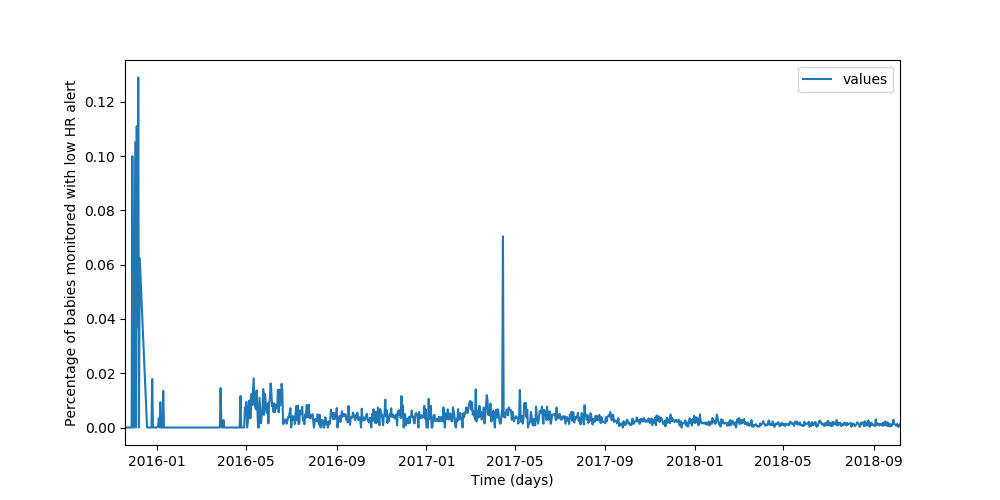

Text(0, 0.5, 'Percentage of babies monitored with low HR alert')

In [107]:
df_low_hr_per_night = pd.DataFrame.from_dict(low_hr_per_night, orient='index', columns=['values'])
df_low_hr_per_night.sort_index(inplace=True)
(df_low_hr_per_night/(df.loc[df['values'] != 0])).fillna(0).plot()
plt.xlabel("Time (days)")
plt.ylabel("Percentage of babies monitored with low HR alert")

<IPython.core.display.Javascript object>


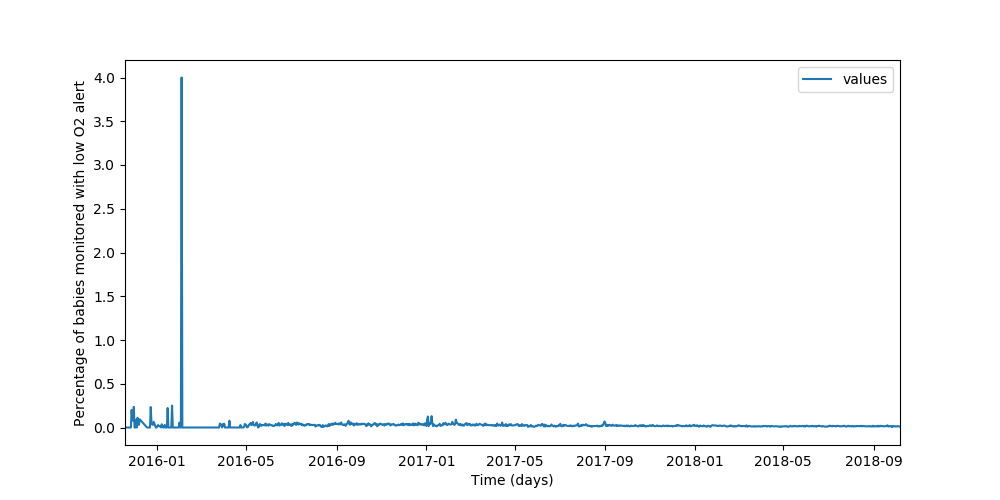

Text(0, 0.5, 'Percentage of babies monitored with low O2 alert')

In [106]:
df_low_o2_per_night = pd.DataFrame.from_dict(low_o2_per_night, orient='index', columns=['values'])
df_low_o2_per_night.sort_index(inplace=True)
(df_low_o2_per_night/(df.loc[df['values'] != 0])).fillna(0).plot()
plt.xlabel("Time (days)")
plt.ylabel("Percentage of babies monitored with low O2 alert")

## Do high HR notifications look like SVT or something else?

#### How many 10 minute chuncks have HR > 220 (how to eliminate duplicates? look at for each dsn, day was the HR > 220)

In [4]:
# Load the dsns df, resample by day and keep max and count how many have HR_max > 220
dsn_num_high_hr = {}
for dsn in tqdm_notebook(dsn_list):
    df_all = pickle.load(open(f'/Users/brodriguez/Documents/Owlet-code/16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    # Resample keep max
    df_all = df_all.resample('D').max()
    dsn_num_high_hr[dsn] = sum(df_all.heart_rate_raw_max.ge(220))

In [5]:
sum(dsn_num_high_hr.values())

20970

In [10]:
devices_with_high_hr = np.array(list(dsn_num_high_hr.values()))

In [13]:
len(devices_with_high_hr[devices_with_high_hr != 0])

6687

In [ ]:
# Of the devices with hr > 220, look for incidents with HR > 240, 260, 280 300 etc

In [16]:
dsns_with_high_hr = []
for dsn, num_high_hr in dsn_num_high_hr.items():
    if num_high_hr > 0:
        dsns_with_high_hr.append(dsn)

In [20]:
hr_more_than_240 = {}
hr_more_than_260 = {}
hr_more_than_280 = {}
hr_more_than_300 = {}
for dsn in tqdm_notebook(dsns_with_high_hr):
    # Look for > 240, 260 etc
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    df_all = df_all.resample('D').max()
    hr_more_than_240[dsn] = sum(df_all.heart_rate_raw_max.ge(240))
    hr_more_than_260[dsn] = sum(df_all.heart_rate_raw_max.ge(260))
    hr_more_than_280[dsn] = sum(df_all.heart_rate_raw_max.ge(280))
    hr_more_than_300[dsn] = sum(df_all.heart_rate_raw_max.ge(300))

In [35]:
devices_240 = np.array(list(hr_more_than_240.values()))
devices_260 = np.array(list(hr_more_than_260.values()))
devices_280 = np.array(list(hr_more_than_280.values()))
devices_300 = np.array(list(hr_more_than_300.values()))

In [37]:
print('Number of instances where HR > 220:',sum(dsn_num_high_hr.values()))
print('Number of instances where HR > 240:',sum(hr_more_than_240.values()))
print('Number of instances where HR > 260:',sum(hr_more_than_260.values()))
print('Number of instances where HR > 280:',sum(hr_more_than_280.values()))
print('Number of instances where HR > 300:',sum(hr_more_than_300.values()))

Number of instances where HR > 220: 20970
Number of instances where HR > 240: 10519
Number of instances where HR > 260: 4935
Number of instances where HR > 280: 2071
Number of instances where HR > 300: 412


In [38]:
print('Number of devices with at least 1 instance of HR > 240', len(devices_with_high_hr[devices_with_high_hr != 0]))
print('Number of devices with at least 1 instance of HR > 240', len(devices_240[devices_240 != 0]))
print('Number of devices with at least 1 instance of HR > 260', len(devices_260[devices_260 != 0]))
print('Number of devices with at least 1 instance of HR > 280', len(devices_280[devices_280 != 0]))
print('Number of devices with at least 1 instance of HR > 300', len(devices_300[devices_300 != 0]))

Number of devices with at least 1 instance of HR > 240 6687
Number of devices with at least 1 instance of HR > 240 4420
Number of devices with at least 1 instance of HR > 260 2586
Number of devices with at least 1 instance of HR > 280 1257
Number of devices with at least 1 instance of HR > 300 311


In [14]:
# pickle.dump(dsn_num_high_hr, open('dsn_num_high_hr.p','wb'))

Out of the 16,000 devices:

6687 of the devices had at least 1 day with HR >= 220 with a total of 20,970 cases

4420 of the devices had at least 1 day with HR >= 240 with a total of 10,519 cases

2586 of the devices had at least 1 day with HR >= 260 with a total of 4935 cases

1257 of the devices had at least 1 day with HR >= 280 with a total of 2071 cases

311 of the devices had at least 1 day with HR >= 300 with a total of 412 cases


## After getting many notifications how many parents turn off the sock later that night (signaling a  possible doctor visit)

In [ ]:
# After an alert when does the data stop? is it comparable to other nights or earlier? make a plot?

In [22]:
# dsn : days with red
dsn_list = pickle.load(open("/Volumes/baileyWD/16k_round_2/rollups_dsns.p", "rb"))
dsn_red = {}
for dsn in tqdm_notebook(list(dsn_list)):
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_2/16000_dfs/{dsn}_df.p', 'rb'))
    red_alerts = df_all.loc[(df_all.base_state_12 == 1)]
    if red_alerts.shape[0] != 0:
        dsn_red[dsn] = [str(x.date()) for x in red_alerts.index]

In [23]:
pickle.dump(dsn_red, open('dsn_days_with_red.p', 'wb'))

In [24]:
len(dsn_red.keys())

9062

## How often do batteries die?

In [ ]:
# try 1st seeing how many 10 min intervals have min battery level < 8

In [3]:
v2_devices = pickle.load(open('V2_monitoring_data/v2_devices.p','rb'))
round_2 = pickle.load(open('16k_round_2/rollups_dsns.p','rb'))
v2_round2 = round_2.intersection(v2_devices)

In [ ]:
DB_USER = 'brodriguez'
DB_PASSWORD = input()
DB_CONN = 'localhost'
DB_NAME = 'owletsock'
# SQL login
s = f'mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_CONN}/{DB_NAME}'
engine = sql.create_engine(s)
conn = engine.connect()

In [24]:
devices_low_battery = {}
for dsn in tqdm_notebook(v2_round2):
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_2/16000_dfs/{dsn}_df.p', 'rb')).drop_duplicates()
#     df_all = pd.read_sql("""select * from tenminsock where dsn = %(d)s""", conn, params={'d':dsn})
    # Should i resample by day?
    resample = df_all[['battery_level_min', 'count']].resample('D')
    df_day_sum = resample.sum()
    df_day_min = resample.min()
    total_days = df_day_min.dropna().shape[0]
    times_battery_died = len(df_day_min.loc[df_day_min.battery_level_min == 0].index)
    devices_low_battery[dsn] = [total_days, times_battery_died]
#     num_dead_battery = df_all.query("battery_level_min == 0").battery_level_min.count()
#     df_day_min.loc[df_day_min.battery_level_min == 0]
#     devices_low_battery[dsn] = num_dead_battery
    # keep track of how many days or how much time each device was used

In [26]:
dead_battery_df = pd.DataFrame.from_dict(devices_low_battery, orient='index',columns=['total_days','times_battery_died'])


In [27]:
pickle.dump(dead_battery_df, open('dead_battery_df.p','wb'))

In [41]:
dead_battery_df = dead_battery_df[dead_battery_df.total_days != 0]

In [43]:
dead_battery_df['percent'] = dead_battery_df.times_battery_died/dead_battery_df.total_days

In [47]:
dead_battery_df.percent.max()

1.0

In [56]:
dead_battery_df[dead_battery_df.percent > .5]#.percent.mean()#.shape

,total_days,times_battery_died,percent
AC000W002637347,17,9,0.529412
AC000W001057025,3,2,0.666667
AC000W001134458,39,27,0.692308
AC000W000503513,3,2,0.666667
AC000W002623977,3,2,0.666667
AC000W000332293,3,2,0.666667
AC000W001201819,1,1,1.000000
AC000W001139067,1,1,1.000000
AC000W002500044,1,1,1.000000
AC000W002672831,1,1,1.000000


In [29]:
dead_battery_df.total_days.sum()

1718217

In [30]:
dead_battery_df.times_battery_died.sum()

62224

In [31]:
62224/1718217

0.036214284924430386

In [ ]:
conn.close()

In [26]:
# dead_battery_df = pd.DataFrame.from_dict(devices_low_battery, orient='index', columns=['times_battery_died'])

In [10]:
import pickle
num_days_used = pickle.load(open('round_2_days_used.p','rb'))

In [14]:
np.linspace(0,len([0,1,2])-1,len([0,1,2]))

array([0., 1., 2.])

In [31]:
n = np.array(num_days_used)
len(n[n==0])

268

In [29]:
(np.array([1,2,3,4]) * 2)/60

array([0.03333333, 0.06666667, 0.1       , 0.13333333])

In [8]:
import numpy as np
np.std(list(d.values()))

0.4714045207910317

In [13]:
dead_battery

73894

In [19]:
devices_low_battery

11034

In [15]:
dead_battery/devices_low_battery

6.696936740982418

In [16]:
devices_low_battery/15997

0.6897543289366757

In [ ]:
# How long was the device used (some don't actually have data)

In [3]:
df_test = pickle.load(open(f'/Volumes/baileyWD/16k_round_2/16000_dfs/AC000W000103378_df.p', 'rb'))
# how is there duplicate indices??

In [24]:
df_test.query("battery_level_min == 0").drop_duplicates()#.battery_level_min.count()

/Users/brodriguez/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:398: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  s = level_values.to_series()
/Users/brodriguez/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:406: FutureWarning: The default of the 'keep_tz' keyword will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  dindex = axis_index.to_series()


,dsn,count,valid_count,movement_raw_mean,movement_raw_min,movement_raw_max,movement_raw_std,skin_temperature_mean,skin_temperature_min,skin_temperature_max,...,oxygen_raw_min,oxygen_raw_max,oxygen_raw_std,base_state_4,base_state_6,base_state_7,base_state_8,base_state_9,base_state_10,base_state_12
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-03-19 08:40:00+00:00,AC000W000103378,182,151.0,3.890110,0.0,30.0,3.558355,193.076923,193.0,194.0,...,94.0,99.0,1.172910,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-04-14 23:20:00+00:00,AC000W000103378,266,0.0,2.484962,1.0,3.0,0.515568,135.000000,135.0,135.0,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-04-17 04:30:00+00:00,AC000W000103378,168,134.0,6.904762,0.0,162.0,18.237370,182.363095,181.0,185.0,...,98.0,101.0,0.693041,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-04 06:30:00+00:00,AC000W000103378,112,97.0,3.553571,1.0,11.0,1.648583,191.089286,191.0,192.0,...,96.0,100.0,0.717958,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-06-10 21:50:00+00:00,AC000W000103378,206,0.0,3.655340,0.0,6.0,1.387275,129.000000,129.0,129.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-04-06 10:40:00+00:00,AC000W000103378,160,0.0,0.056250,0.0,3.0,0.408200,132.543750,132.0,134.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-10-11 07:00:00+00:00,AC000W000103378,136,97.0,1.919118,0.0,12.0,2.372856,171.000000,171.0,171.0,...,97.0,98.0,0.342444,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
list(dsn_list)[0]

'AC000W002669028'

11,034 devices had at least 1 instance of a battery dying. (68.9%)

There were a total of 73,894 incidents of the battery dying. (out of how many days of use?..)

#### Battery died vs hrs of use

In [28]:
time_battery_df = device_hrs.join(dead_battery_df)

<IPython.core.display.Javascript object>


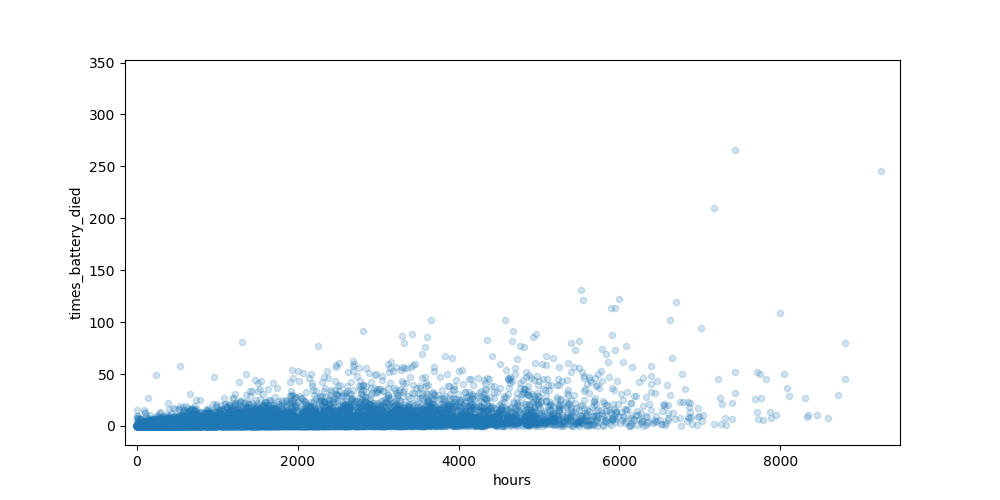

In [42]:
time_battery_df.plot(kind="scatter", x="hours", y="times_battery_died", alpha=.2)


In [43]:
time_battery_df.hours.sum()

23680065.718888886

In [49]:
time_battery_df.query("hours > 30").shape

(14053, 2)

In [44]:
time_battery_df.times_battery_died.sum()

73894

In [46]:
(73894/23680065.72)*100

0.3120514988165329

In [50]:
73640/14053 # Devices that monitored more than 30 hrs

5.240162242937451

## How many V2 devices have we collected data for, how many total hours?

In [ ]:
registration = pd.read_csv('/Users/brodriguez/Documents/parsed_registration_pre_20190113.csv', compression='gzip', index_col=0)
reg_16k = set(dsn_list).intersection(list(registration.dsn.values))


In [ ]:
non_charging_data = []
for dsn in tqdm_notebook(reg_16k):
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    if df_all.shape[0] > 0:
        non_charging_data.append(dsn)

In [ ]:
len((non_charging_data))

In [17]:
# Calculate # of hours of data for each device
hours_of_data_per_device = {}
for dsn in tqdm_notebook(dsn_list):#non_charging_data
    df_all = pickle.load(open(f'/Volumes/baileyWD/16k_round_1/16000_dfs/{dsn}_df.p', 'rb'))
    # Sum total count * 2 ?
    if df_all.shape[0] == 0:
        hours_of_data_per_device[dsn] = 0
    else:
        seconds = df_all['count'].sum() * 2 # Total number of data points collected (represent 2 seconds)
        hours = (seconds / 60) / 60
        hours_of_data_per_device[dsn] = hours

In [22]:
device_hrs = pd.DataFrame.from_dict(hours_of_data_per_device, orient='index', columns=['hours'])

In [24]:
device_hrs[device_hrs.hours < 30]

,hours
AC000W002627006,8.860556
AC000W002435563,0.000000
AC000W001090099,0.000000
AC000W000452644,28.878333
AC000W000658769,7.495000
AC000W001184426,3.746111
AC000W000419019,12.208333
AC000W001182386,0.236111
AC000W001047600,0.231111
AC000W002445333,0.000000


In [18]:
pickle.dump(hours_of_data_per_device, open(f'/Volumes/baileyWD/16k_round_1/hours_of_data_per_device.p', 'wb'))

In [ ]:
total_hours = sum(hours_of_data_per_device.values())
# Double check to make sure that there are no 0's in the values
print(total_hours)

In [ ]:
# Devices with > 3 days of data
hours = np.array(list(hours_of_data_per_device.values()))
len(hours[hours >= 72])

234,856 devices that were registered in or after February 2017 and before Feb 2019

12,649/15,997 devices were registered in or after February 2017

12,373/12,649 devices have non-charging data

1,170,881,189.90 hours of field data have been collected by these devices prior to Jan 2019 (that were registered on or after Feb 2017 not counting charging data)

Extrapolations

~237,213 devices were registered in or after Feb 2017 (about 3,000 off)

~229,689 - 231,994 devices were registered in or after February 2017 and have collected non-charging data

~21,735,919,310.35 -  21,954,022,310.65 hours of field data have been collected from these devices
 probably less than this because devices that started use end of 2018 have not reached a lifetime of use